# Objective

The goal of this model is to predict April and May's coverage pay totals.

In [1]:
#importing packages
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt
import seaborn as sns
from statsmodels.formula.api import ols 

In [2]:
#importing data
df = pd.read_csv(r'/Users/scipio/Downloads/Untitled spreadsheet - Coverage Pay  (2).csv')

In [3]:
#dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   8 non-null      int64  
 1   Month   8 non-null      object 
 2   Total   8 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


In [4]:
# Coverage Pay Total Statistical Metrics
df['Total'].describe()

count        8.000000
mean     21950.277500
std       6975.403498
min       5973.100000
25%      20573.585000
50%      24583.430000
75%      25366.165000
max      28501.860000
Name: Total, dtype: float64

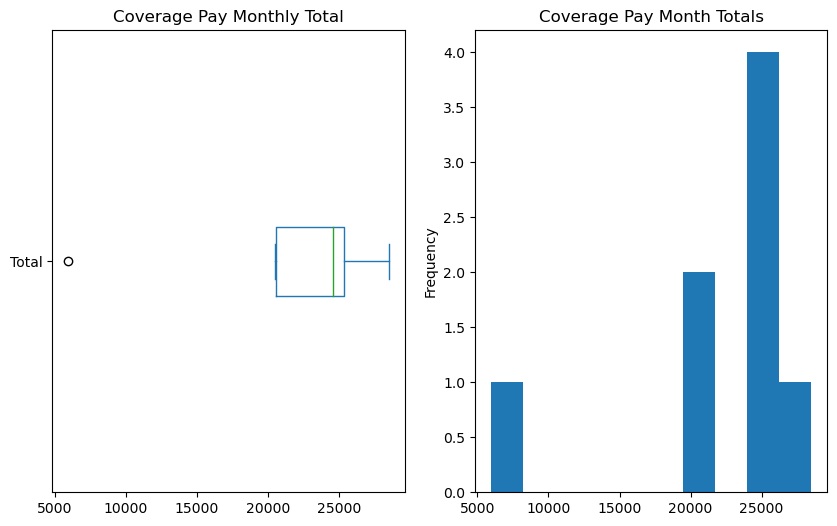

In [5]:
# Coverage Pay Total Distribution
fig, ax = plt.subplots(nrows =1 , ncols =2, figsize = (10,6))

df['Total'].plot(kind = 'box', vert = False, ax = ax[0],title = 'Coverage Pay Monthly Total')
df['Total'].plot(kind = 'hist', title = 'Coverage Pay Month Totals')

plt.show()

There is a left skew in the data based on the histogram. Additonally, based on the box plot above there is a left skew in the data.

In [6]:
# Coverage Pay Monthly Totsl Outliers
_75 = df['Total'].quantile(.75)
_25 = df['Total'].quantile(.25)
IQR = _75 - _25

Upper_Outlier = round(_75 + (1.5 * IQR ),2)
Lower_Outlier = round(_25 - (1.5 * IQR ),2)
print('A month with greater than or equal to',f"${Upper_Outlier:,}",
      'in total coverage pay is considered to be an outlier. A month with less or equal to',
     f"${Lower_Outlier:,}",'is considered to be an outlier')

A month with greater than or equal to $32,555.04 in total coverage pay is considered to be an outlier. A month with less or equal to $13,384.71 is considered to be an outlier


In [7]:
# Finding outliers in the dataset
df[(df['Total']<= Lower_Outlier)| (df['Total']>= Upper_Outlier)] # <- filtering for outliers

,Index,Month,Total
0,0,August,5973.1


In [8]:
# Excluding outliers from the dataset
df = df[~(df['Total']<= Lower_Outlier)| (df['Total']>= Upper_Outlier)]
df

,Index,Month,Total
1,1,September,20607.52
2,2,October,25589.32
3,3,November,24844.33
4,4,December,24322.53
5,5,January,20471.78
6,6,February,25291.78
7,7,March,28501.86


In [9]:
#Creating model
mdl_coverage_pay = ols('Total ~ Index', data = df).fit()

In [10]:
# printing model parameters
print(mdl_coverage_pay.params)

Intercept    21559.104286
Index          668.406786
dtype: float64


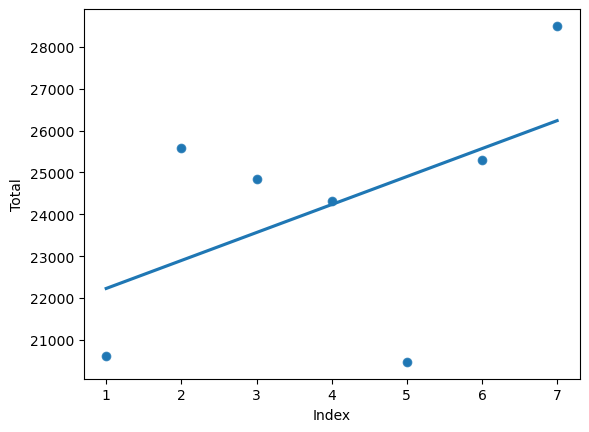

In [11]:
#Visualzing coverage pay data
sns.scatterplot( x = 'Index',
        y = 'Total',
        data = df)

sns.regplot(x = 'Index',
           y = 'Total', 
            data = df,
           ci = None)

plt.show()

In [12]:
#Creating a dataframe for predictions
explanatory_data = pd.DataFrame({'Index':np.arange(8,11)})
explanatory_data.head()

,Index
0,8
1,9
2,10


In [13]:
#Predicting values
print(round(mdl_coverage_pay.predict(explanatory_data)))

0    26906.0
1    27575.0
2    28243.0
dtype: float64


In [14]:
# Adding predicted values to dataframe
prediction_data = explanatory_data.assign(Total = round(mdl_coverage_pay.predict(explanatory_data)))
prediction_data

,Index,Total
0,8,26906.0
1,9,27575.0
2,10,28243.0


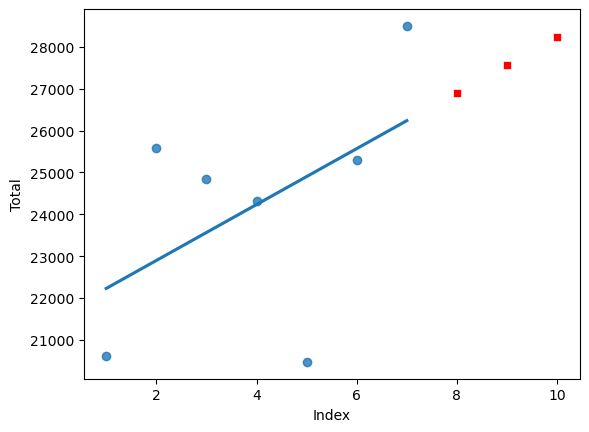

In [15]:
#Displaying predictions
plt.figure() # <- creating figure

sns.regplot(x = 'Index', # <- plotting regression of dataset
           y = 'Total', 
            data = df,
           ci = None)

sns.scatterplot(x = 'Index',
               y = 'Total',
               data = prediction_data,
               color = 'red',
               marker = 's')

plt.show()


In [16]:
print('R-Squared:',round(mdl_coverage_pay.rsquared,2))

R-Squared: 0.26


The R-Squared value is .26, which is less than ideal and is indicative due of the large number of variables, e.g. school days, vacancies, etc., affecting coverage pay submissions and overall monthly coverage pay totals.

In [17]:
mse = mdl_coverage_pay.mse_resid
rse = round(np.sqrt(mse))
print('RSE:',f'${rse:,}')

RSE: $2,696


The RSE is \\$2,696 $ meaning there is typically a \\$2,696 difference between observed and predicted values by the model.

In [18]:
# Prediction data data cleaning
prediction_data['Month'] = ['April','May','June'] # <- Adding Months
prediction_data['Upper Total'] = prediction_data['Total'] + rse # < - Creating upper range for prediction
prediction_data['Lower Total'] = prediction_data['Total'] - rse # < - Creating lower range for prediction

prediction_data[['Index','Month','Lower Total','Total','Upper Total']]

,Index,Month,Lower Total,Total,Upper Total
0,8,April,24210.0,26906.0,29602.0
1,9,May,24879.0,27575.0,30271.0
2,10,June,25547.0,28243.0,30939.0
